<a href="https://colab.research.google.com/github/krishnasd1007/Portfolio-Optimization/blob/main/Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
path = '/gdrive/My Drive/'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline

## **Data**

In [ ]:
data = pd.read_csv(path + 'data.csv')
data = data.dropna()
data = (data - data.mean())/data.std()
data.head()

,BBC,CRBN,GENY,HDMV,IBMQ,JNMF,JPMV,MCRO,WIZ,XOUT
0,-1.760251,-1.028700,0.110624,1.346595,-1.954417,2.175184,-0.530278,-1.272652,-0.306588,-1.008410
1,-1.405412,-1.028700,0.596818,1.176090,-1.910275,1.785981,-0.303484,-1.080434,-0.338375,-1.256879
2,-1.193546,-1.860785,0.596818,1.096439,-1.914688,1.141222,-0.643672,-0.636842,-0.321037,-1.124327
3,-1.215769,-1.864237,-0.432795,1.332902,-1.755765,0.707812,-0.889358,-1.021287,-0.407731,-1.045975
4,-1.882481,-1.719223,-0.432795,1.332902,-1.733692,1.596811,-0.757067,-1.346589,-0.360049,-0.893567


In [ ]:
ni = np.array(data)

In [ ]:
def mu(d):
  n = len(d)
  sum = 0
  for i in d:
    sum = sum + i

  mean = sum/n
  return mean

In [ ]:
def cov(x,y):
  X = (x - mu(x))
  Y = (y - mu(y))
  sop = np.dot(X,Y.T)
  N = len(x) + len(y)

  covariance = sop/N

  return covariance

In [ ]:
def cov_matrix(df):
  c = len(df.columns)
  r = c
  mat = [[0]*c]*r

  for i in range(r):
    x = df.iloc[:,i]
    x = np.array(x)
    for j in range(c):
      y = df.iloc[:,j]
      y = np.array(y)
      mat[i][j] = cov(x,y)

  mat = np.array(mat)
    
  return mat

In [ ]:
def Variance(data,n):
  X = n
  Q = cov_matrix(data)

  exp = np.dot(X.T,Q)
  V = np.dot(exp,X)

  return V

In [ ]:
def Return(data,n):
  ret = []
  data = np.array(data)
  for i in range(len(data)):
    m = np.dot(n.T,data[i])
    ret.append(m)

  return np.mean(ret)

## **Random Approach**

In [ ]:
def wt(data,epochs):
  df = data
  data = np.array(data)
  weights = []
  opt = []

  for i in range(epochs):
    n = np.random.random(len(data[0]))
    n = n/np.sum(n)
    n = np.array(n)

    F = Variance(df,n) - Return(data,n)
    opt.append(F)
    weights.append(n)

  index = opt.index(np.min(opt))

  return weights[index]

In [ ]:
n = np.array(wt(data,100))*100

In [ ]:
n

array([ 2.75406023,  3.4219782 , 13.91379504, 18.36715344, 20.42654539,
       16.36981907, 16.21032588,  2.06404322,  1.15640782,  5.31587171])

## **Linear Programming**

### **Search Approach**

1. convert each inequality constraint to equality
2. solve the constraint equations to find intersection points by taking 2 constraint lines at a time
3. compute value of objective function at each point and find the max or min value

Maximize  $s1x1 + s2x2 + ....$ = fixed amount constraint not given yet


n = weight vector

x = stock closing price


In [ ]:
def objective(x,s):
  F = np.dot(x.T,s)
  return F

Summation of all weights = 1

each $x<=1$

each $x>=-1$

solving constraint equations for extreme points

wont work will have to take equations 2 at a time and solve, 21C2

In [ ]:
def matrices(n):
  n = len(n)
  a = [1]*n
  b = np.identity(n)
  coeff = np.vstack([a,b,b]) 

  c = [1]*(n+1)
  d = [-1]*n
  left = c + d
  left = np.array(left)

  return coeff,left

In [ ]:
def solution(coef,const):
  coeff = np.linalg.pinv(coef)
  soln = np.dot(coeff,const)
  return soln

In [ ]:
def combinations(matrix,c):
  combs = [(0)*c]
  n = len(matrix)

  for i in range(n):
    for j in range(i+1,n):
      combs = combs + [(i,j)]
  
  del combs[0]
      
  return combs

In [ ]:
def extreme_points(n,c):
  m = matrices(n)[0]
  con = matrices(n)[1]
  combs = combinations(m,c) 
  l = len(m)
  soln = []

  for i in range(l):
    j = 0
    sol = [m[combs[i][j]], m[combs[i][j+1]]]
    const = [con[combs[i][j]],con[combs[i][j+1]]]
    soln.append(solution(sol,const))

  return soln

In [ ]:
def optimal_value(n):
  F = []
  w = extreme_points(n,2)
  l = len(w)

  for i in range(l):
    F.append(objective(w[i],n))

  index = F.index(np.max(F)) #maximum point

  return w[index]

In [ ]:
optimal_value(ni[0])

array([-5.55111512e-17, -1.38777878e-17,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00])

### **ISO Profit approach**

1. convert each inequality constraint to equality
2. solve the constraint equations to find intersection points by taking 2 constraint lines at a time
3. choose a profit line of objective function that falls within feasible region
4. Move line parallel to itself away from origin
5. max point is the extreme point touched by maximum possible profit line in feasible region

## **Constraint Non Linear Programming**

### **Graphical Approach 1** 

1. Try different curve parallel to the random objective function curve
2. Find curves which has only 1 intersection point with constraint equations
3. Find max and min points among them
4. May not get the optimal point but can get near optimal over some epochs

In [ ]:
def obj(data,w,c):
  F = Variance(data,w) - Return(data,w) - c
  return F

**Constraints**

Summation of all weights = 1

each $x<=1$

each $x>=-1$

In [ ]:
w = np.random.random(len(ni[0]))
w

array([0.73309236, 0.8791181 , 0.30628003, 0.72615562, 0.92267591,
       0.19800548, 0.20207886, 0.28449117, 0.22619135, 0.81420861])

### **Graphical Approach 2** 

1. Try different curve parallel to the random objective function curve
2. Find curves which has gradient same direction as gradient of constraint for max point and gradient opposite direction for min point ??
3. Find max and min points among them
4. May not get the optimal point but can get near optimal over some epochs

### **Newton's optimization** 

In [ ]:
def Variance(data,Q,n):
  X = n
  exp = np.dot(X.T,Q)
  V = np.dot(exp,X)

  return V

In [ ]:
def Return(data,n):
  ret = []
  data = np.array(data)
  for i in range(len(data)):
    m = np.dot(n.T,data[i])
    ret.append(m)

  return np.mean(ret)

In [ ]:
def obj(Q,data,w):
  F = Variance(data,Q,w) - Return(data,w) 
  return F

In [ ]:
def gradient(Q,data,w):
  X = w
  e1 = np.matmul(Q,X)
  e2 = 2*e1
  d = e2 - data
  return d

In [ ]:
def Newtons_optimization(data,w,Q,learning_rate,max_epoch):
  objval = []
  g2 = np.linalg.det(2*Q) + 1 ## 2nd derivative of objective function with smoothing

  for i in range(max_epoch):
    g = gradient(Q,data,w)
    w = w - learning_rate*g/g2
    o = obj(Q,data,w)
    objval.append(o)

  return w/np.sum(w),objval

In [ ]:
Q = cov_matrix(data)
w = np.random.random(len(ni[0]))

In [ ]:
weights,objective = Newtons_optimization(ni[0],w,Q,0.01,10)

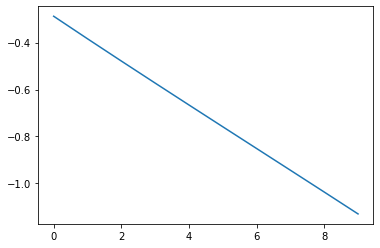

In [ ]:
plt.plot(list(range(10)),objective)

### **NLP with equality constraints using Lagrange Multiplier** 

1. take dot product of lagrange multiplier vector with vector of constraint equations
2. subtract the product from objective function to form a new function
3. Take derivative of new function w.r.t both x and lagrange multiplier and set = 0 
4. solve the derivative equations for optimal x and lm values

### **NLP/Quadratic solving with KKT condition** 

**Basic Features**

1. objective function linear or non linear
2. constraints linear or non linear
3. constraints can be equality or inequality

**KKT conditions**
1. objective function concave
2. each constraint is convex


## **Metaheuristic approaches**

### **Hill Climbing Method**

1. initialize a random point in search space
2. find neighbouring points
3. move to point with best function value
4. repeat step 2 and 3 till all neighbouring points lower or higher value

But starting point matters here because of local minima problem

In [ ]:
def Variance(data,Q,n):
  X = n
  exp = np.dot(X.T,Q)
  V = np.dot(exp,X)

  return V

In [ ]:
def Return(data,n):
  ret = []
  data = np.array(data)
  for i in range(len(data)):
    m = np.dot(n.T,data[i])
    ret.append(m)

  return np.mean(ret)

In [ ]:
def obj(Q,data,w):
  F = Variance(data,Q,w) - Return(data,w) 
  return F

In [ ]:
def gradient(Q,data,w):
  X = w
  e1 = np.matmul(Q,X)
  e2 = 2*e1
  d = e2 - data
  return d

In [ ]:
Q = cov_matrix(data)
w = np.random.random(len(ni[0]))
gradient(Q,ni[0],w)

array([ 1.90783136,  1.17628074,  0.03695686, -1.19901448,  2.10199748,
       -2.02760334,  0.67785815,  1.42023288,  0.4541683 ,  1.15599109])

In [ ]:
def hill_descent(data,w,Q,learning_rate,max_epoch):

  objval = []

  for i in range(max_epoch):
    g = gradient(Q,data,w)
    pl = w - learning_rate*g 
    pr = w + learning_rate*g
    olt = obj(Q,data,pl)
    ort = obj(Q,data,pr)
    o = obj(Q,data,w)
    objval.append(o)
    if(olt<o):
      w = pl
    else:
      w = pr
    if(o<olt and o<ort):
      break

  return w/np.sum(w),objval

In [ ]:
weight,objective = hill_descent(ni[0],w,Q,0.000000001,100) ##based on only 1 data row

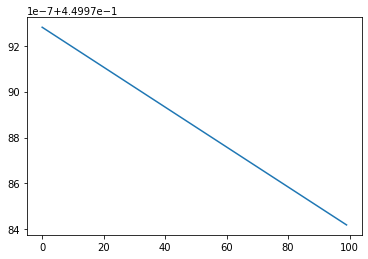

In [ ]:
plt.plot(list(range(100)),objective)

### **Simulated Annealing**

1. select 4 random points from search space
2. T = plug in 4 points in function and take average 
3. choose a random initial design point X1
4. iteration 1
    1. generate new design point X2 = [r1,r2]
    2. r1, r2 = 2 uniformly distributed random numbers
    3. find f(X1) - f(X2)
    4. if difference < 0